In [56]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from collections import Counter

In [57]:
df = pd.read_csv('data.csv', encoding='latin1')
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [59]:
df.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0


In [60]:
df.shape

(13169, 13)

In [61]:
df.duplicated().sum()

125

In [62]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [63]:
df.isna().sum()/df.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [64]:
df_abusive = pd.read_csv("data/abusive.csv")
abusive_list = df_abusive["ABUSIVE"].tolist()

df_singkatan = pd.read_csv(
    "data/new_kamusalay.csv", header=None, names=["singkatan", "kalimat"]
)
singkatan_dict = dict(zip(df_singkatan["singkatan"], df_singkatan["kalimat"]))

In [65]:
def cleansing(text):
    text = re.sub(r"\\", "", text)
    text = re.sub(r"x\d+", " ", text)
    text = text.lower()
    text = re.sub(r"[^A-Za-z0-9]", " ", text)

    return text

def expand_singkatan(text):
    words = text.split()
    expanded_text = []
    for word in words:
        if word in singkatan_dict:
            expanded_text.append(singkatan_dict[word])
        else:
            expanded_text.append(word)
    return " ".join(expanded_text)

df['Tweet'] = df['Tweet'].apply(cleansing)
df['Tweet'] = df['Tweet'].apply(expand_singkatan)

abusive_word_counts = []
for text in df['Tweet']:
    count = sum(1 for word in abusive_list if re.search(fr'\b{re.escape(word)}\b', text, flags=re.IGNORECASE))
    abusive_word_counts.append(count)
    
df['abusive_word_count'] = abusive_word_counts

df

C:\Users\Darren Iskandar\AppData\Local\Temp\ipykernel_13964\1161312138.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df['Tweet'].apply(cleansing)
C:\Users\Darren Iskandar\AppData\Local\Temp\ipykernel_13964\1161312138.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df['Tweet'].apply(expand_singkatan)
C:\Users\Darren Iskandar\AppData\Local\Temp\ipykernel_13964\1161312138.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,abusive_word_count
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,1
1,rt pengguna pengguna siapa yang telat memberi ...,0,1,0,0,0,0,0,0,0,0,0,0,2
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,pengguna pengguna aku itu akunnku tau matamu s...,0,0,0,0,0,0,0,0,0,0,0,0,1
4,pengguna pengguna kaum cebong kafir sudah keli...,1,1,0,1,1,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,pengguna jangan asal berbicara ndasmu congor k...,1,1,1,0,0,0,1,0,0,1,0,0,2
13165,pengguna kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,1
13166,pengguna hati hati bisu gnnlagi bosan duh xf0 ...,0,0,0,0,0,0,0,0,0,0,0,0,1
13167,pengguna pengguna pengguna pengguna bom yang r...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df['total_char'] = df.Tweet.apply(len)
df['word'] = df.Tweet.apply(lambda x: x.split())
df['total_word'] = df.Tweet.apply(lambda sent: len(sent.split()))

df.head()

C:\Users\Darren Iskandar\AppData\Local\Temp\ipykernel_13964\1866818994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_char'] = df.Tweet.apply(len)
C:\Users\Darren Iskandar\AppData\Local\Temp\ipykernel_13964\1866818994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word'] = df.Tweet.apply(lambda x: x.split())
C:\Users\Darren Iskandar\AppData\Local\Temp\ipykernel_13964\1866818994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,abusive_word_count,total_char,word,total_word
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,1,133,"[di, saat, semua, cowok, berusaha, melacak, pe...",22
1,rt pengguna pengguna siapa yang telat memberi ...,0,1,0,0,0,0,0,0,0,0,0,0,2,128,"[rt, pengguna, pengguna, siapa, yang, telat, m...",22
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,0,251,"[41, kadang, aku, berpikir, kenapa, aku, tetap...",39
3,pengguna pengguna aku itu akunnku tau matamu s...,0,0,0,0,0,0,0,0,0,0,0,0,1,81,"[pengguna, pengguna, aku, itu, akunnku, tau, m...",14
4,pengguna pengguna kaum cebong kafir sudah keli...,1,1,0,1,1,0,0,0,0,0,1,0,3,94,"[pengguna, pengguna, kaum, cebong, kafir, suda...",14


In [67]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['text_token'] = df['Tweet'].apply(word_tokenize_wrapper)
df.head()

C:\Users\Darren Iskandar\AppData\Local\Temp\ipykernel_13964\1167509593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_token'] = df['Tweet'].apply(word_tokenize_wrapper)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,abusive_word_count,total_char,word,total_word,text_token
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,1,133,"[di, saat, semua, cowok, berusaha, melacak, pe...",22,"[di, saat, semua, cowok, berusaha, melacak, pe..."
1,rt pengguna pengguna siapa yang telat memberi ...,0,1,0,0,0,0,0,0,0,0,0,0,2,128,"[rt, pengguna, pengguna, siapa, yang, telat, m...",22,"[rt, pengguna, pengguna, siapa, yang, telat, m..."
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,0,251,"[41, kadang, aku, berpikir, kenapa, aku, tetap...",39,"[41, kadang, aku, berpikir, kenapa, aku, tetap..."
3,pengguna pengguna aku itu akunnku tau matamu s...,0,0,0,0,0,0,0,0,0,0,0,0,1,81,"[pengguna, pengguna, aku, itu, akunnku, tau, m...",14,"[pengguna, pengguna, aku, itu, akunnku, tau, m..."
4,pengguna pengguna kaum cebong kafir sudah keli...,1,1,0,1,1,0,0,0,0,0,1,0,3,94,"[pengguna, pengguna, kaum, cebong, kafir, suda...",14,"[pengguna, pengguna, kaum, cebong, kafir, suda..."


In [68]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'xf0', 'f', 'pengguna', 'url',
                       'resource', 'locator', 'uniform',
                       ])

list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df["text_remove_stopwords"]= df['text_token'].apply(stopwords_removal)

df["text_remove_stopwords"]=df["text_remove_stopwords"].str.join(sep=" ")

C:\Users\Darren Iskandar\AppData\Local\Temp\ipykernel_13964\3985668637.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_remove_stopwords"]= df['text_token'].apply(stopwords_removal)
C:\Users\Darren Iskandar\AppData\Local\Temp\ipykernel_13964\3985668637.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_remove_stopwords"]=df["text_remove_stopwords"].str.join(sep=" ")


In [69]:
abusive_word_counts = []

for idx, group in df.groupby('HS'):
    count = 0
    for text in group['Tweet']:
        count += sum(1 for word in abusive_list if re.search(fr'\b{re.escape(word)}\b', text, flags=re.IGNORECASE))
    abusive_word_counts.append(count)
    
result_df = pd.DataFrame({'HS': df['HS'].unique(), 'total_abusive_words': abusive_word_counts})
result_df

,HS,total_abusive_words
0,1,4552
1,0,5226


In [70]:
abusive_word_counts = []

for idx, group in df.groupby('Abusive'):
    count = 0
    for text in group['Tweet']:
        count += sum(1 for word in abusive_list if re.search(fr'\b{re.escape(word)}\b', text, flags=re.IGNORECASE))
    abusive_word_counts.append(count)
    
result_df = pd.DataFrame({'Abusive': df['Abusive'].unique(), 'total_abusive_words': abusive_word_counts})
result_df

,Abusive,total_abusive_words
0,1,3272
1,0,6506


In [71]:
sentence_count = df.groupby(df.HS).size()
sentence_count

HS
0    7526
1    5518
dtype: int64

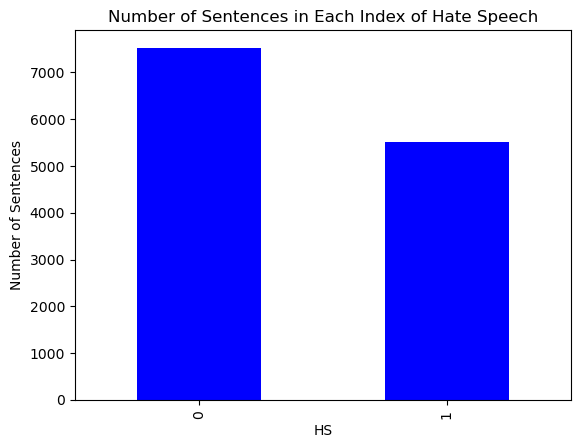

In [72]:
sentence_count.plot(kind='bar', color='blue')
plt.xlabel('HS')
plt.ylabel('Number of Sentences')
plt.title('Number of Sentences in Each Index of Hate Speech')
plt.show()

In [73]:
sentence_count = df.groupby(df.Abusive).size()
sentence_count

Abusive
0    8039
1    5005
dtype: int64

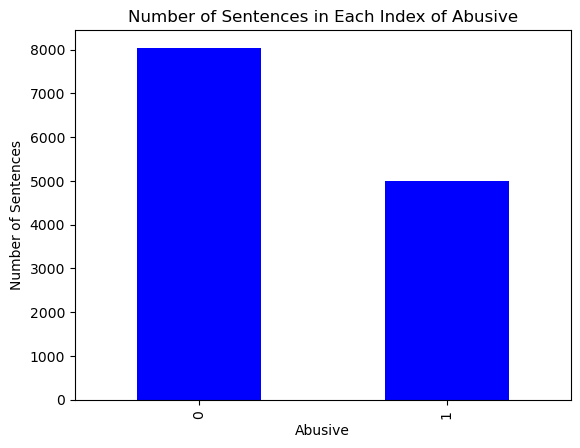

In [80]:
sentence_count.plot(kind='bar', color='blue')
plt.xlabel('Abusive')
plt.ylabel('Number of Sentences')
plt.title('Number of Sentences in Each Index of Abusive')
plt.show()

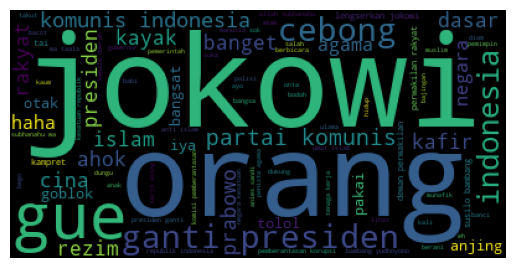

In [81]:
text = ' '.join(df['text_remove_stopwords'][df.HS==1])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

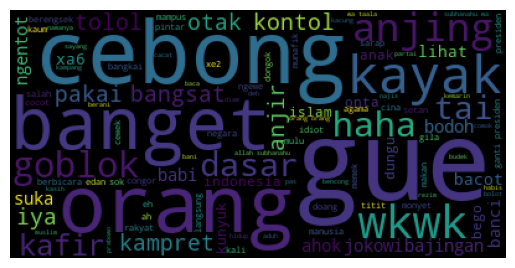

In [82]:
text = ' '.join(df['text_remove_stopwords'][df.Abusive==1])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()